In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Contents

* polynomial 표현 
  * poly1d
* root를 주고 polynomial을 구하기   
  * poly
* 선형회귀
  * polyfit  
* 연립 방정식 풀기 
  * linalg.solve
  * linalg.lstsq

## polynomial 표현 

* poly1d
* polyval

In [4]:
p = np.poly1d([1,-2,1])
p

poly1d([ 1, -2,  1])

In [5]:
print(p)    # 다항식 표현 

   2
1 x - 2 x + 1


In [6]:
p.variable  # 다항식 변수

'x'

In [8]:
p.order # 다항식 차수

2

In [10]:
p.coef # 다항식 계수

array([ 1, -2,  1])

In [11]:
p.roots  # 방정식의 해 

array([1., 1.])

In [19]:
# 다항식  evaluation

evaled = np.polyval([1,-2,1],3)
print(evaled)

assert evaled == 1*(3**2) -2*(3) + 1

4


In [26]:
# 다항식끼리 연산 

p = np.poly1d([1,2]) + np.poly1d([1,-2])    # (x+2)+(x-2) = 2x
print(p)

p = np.poly1d([1,2]) * np.poly1d([1,-2])    # (x+2)*(x-2) = x^2 - 4
print(p)

 
2 x
   2
1 x - 4


In [21]:
# 

 
1 x + 2


In [22]:
print(np.poly([1,-2]))

[ 1.  1. -2.]


In [23]:
np.poly([1,-2])

array([ 1.,  1., -2.])

## root를 주고 polynomial을 구하기   

In [29]:
root = [1]
coeff = np.poly(root)    
print(np.poly1d(coeff))

 
1 x - 1


In [31]:
root = [1, 1]
coeff = np.poly(root)
print(np.poly1d(coeff))

   2
1 x - 2 x + 1


In [32]:
root = [1,1,1]
coeff = np.poly(root)
print(np.poly1d(coeff))

   3     2
1 x - 3 x + 3 x - 1


## 선형회귀

* polyfit

In [35]:
# 노이즈 섞인 직선 생성

x = np.arange(0, 10, 0.01)     
y = 3*x + 5
y_noise = y + np.random.randn(len(y))

In [37]:
# 선형 회귀선
deg = 1
fitted = np.polyfit(x, y_noise, deg)
p = np.poly1d(fitted)
print(p)

 
2.982 x + 5.086


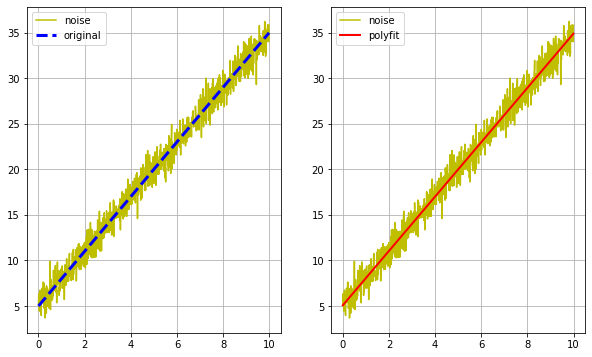

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))

axes[0].plot(x, y_noise, label='noise', color='y')
axes[0].plot(x, y, ls='dashed', lw=3, color='b', label='original')
axes[0].legend()
axes[0].grid()

axes[1].plot(x, y_noise, label='noise', color='y')
axes[1].plot(x, p(x), lw=2, color='r', label='polyfit')
axes[1].legend()
axes[1].grid()

plt.show()

## 연립 방정식 풀기

* linalg.solve

In [39]:
# 3*x0 + x1 = 9
# x0 + 2*x1 = 8

A = np.array([[3,1], [1,2]])
b = np.array([9,8])

In [42]:
x = np.linalg.solve(A,b)
x

array([2., 3.])

In [44]:
np.allclose(np.dot(A,x), b)  # 검증

True

In [45]:
# 1*x0  +  0*x1  +  0*x2 = 0
# 1*x0  +  1*x1  +  1*x2 = 24
# 6*x0  +  7*x1  +  0*x2 = 0

A = np.array([[1,0,0], [1,1,1], [6,7,0]])
b = np.array([0,24,0])

In [46]:
x = np.linalg.solve(A,b)
x

array([ 0., -0., 24.])

In [47]:
np.allclose(np.dot(A,x), b)  # 검증

True

In [50]:
# 역행렬로 풀어보기 

A_inv = np.linalg.inv(A)
np.dot(A_inv, b)

array([ 0.,  0., 24.])

## least square solution으로 풀어보기 

* linalg.lstsq 

In [51]:
# 1*x0  +  0*x1  +  0*x2 = 0
# 1*x0  +  1*x1  +  1*x2 = 24
# 6*x0  +  7*x1  +  0*x2 = 0

A = np.array([[1,0,0], [1,1,1], [6,7,0]])
b = np.array([0,24,0])

In [54]:
solved = np.linalg.solve(A,b)
solved

array([ 0., -0., 24.])

In [52]:
x, residual, rank, singular = np.linalg.lstsq(A, b, rcond=-1)   # rcond : Cut-off ratio for small singular values

In [56]:
np.allclose(x, solved)  # solve로 푼 것과 lstsq로 푼 것이 동일 

True